# SAS to Python code conversion with Jupyter magic

### Create a "sasconvert" magic function
Saved as a python file (sasconver.py)

In [8]:
%%writefile ./sasconvert.py
from IPython.display import display, HTML
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")
gptModel="text-davinci-003"

def codeBlock(text):
    fmt_prefix='<code style="font:DejaVu Sans Mono,consolas,monaco,monospaced;background-color: #eee;border: 1px solid #999;display: block;padding: 20px;" id="codeText">'
    fmt_suffix='</code>'
    html_code_block=fmt_prefix+text+fmt_suffix
    return html_code_block

def sasconvert(options, prompt):
    basePrompt="##### Translate this program from SAS into Python\n### SAS\n"
    gptPrompt=basePrompt+prompt+"\n### Python"
    response = openai.Completion.create(
      model=gptModel,
      prompt=gptPrompt,
      temperature=0,
      max_tokens=150,
      top_p=1.0,
      frequency_penalty=0.0,
      presence_penalty=0.0,
      stop=["###"]
    )
    #print(response["choices"][0]["text"])
    response_text=response["choices"][0]["text"]
    formatted_output=codeBlock(response_text)
    display(HTML(formatted_output))

def load_ipython_extension(ipython):
    ipython.register_magic_function(sasconvert, 'cell')

Overwriting ./sasconvert.py


### Make sure the file is in our path

In [9]:
import sys
sys.path.append('.')

### Load the file as a Jupyter extension

In [5]:
%load_ext sasconvert

### Run it!

In [11]:
%%sasconvert
/* Here is my working SAS program */
/* Simple Linear Regression and scatter plot */
data crack;
  input id age load;
  datalines;
  1  20 11.45
  2  20 10.42
  3  20 11.14
  4  25 10.84
  5  25 11.17
  6  25 10.54
  7  31  9.47
  8  31  9.19
  9  31  9.54
  ;
 
proc plot data=crack;
  plot load * age = "*";
run;

---
### Copy the output above and paste it into the cell below and run it

Text(0.5, 0, 'Age')

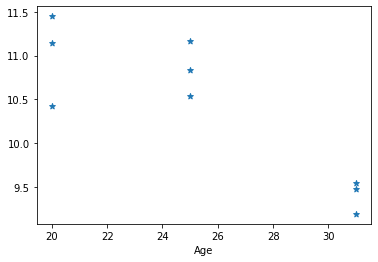

In [12]:
# Here is my working Python program
# Simple Linear Regression and scatter plot
import matplotlib.pyplot as plt

# Create data
id = [1, 2, 3, 4, 5, 6, 7, 8, 9]
age = [20, 20, 20, 25, 25, 25, 31, 31, 31]
load = [11.45, 10.42, 11.14, 10.84, 11.17, 10.54, 9.47, 9.19, 9.54]

# Plot data
plt.scatter(age, load, marker='*')
plt.xlabel('Age')